## 1. Gather Data

In this section, I will be pulling demographic & geographical data from .csv files into dataframes.

In [1]:
#Import libraries needed for gathering & wrangling data
import numpy as np
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize 

print('Libraries imported.')

Libraries imported.


### Pulling Data into Dataframes
The following section of code reads mulitple .csv files into dataframes for use in this project.

In [2]:
#Bring the geographical data from a .csv to a dataframe named "wv_geo"
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# Credentials removed for the purpose of sharing the notebook
client_d362 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=,
    ibm_auth_endpoint=,
    config=Config(signature_version='oauth'),
    endpoint_url=)

body = client_d362.get_object(Bucket='courseracapstoneproject-donotdelete-pr-',Key='wv_geo.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

wv_geo = pd.read_csv(body)
wv_geo.head()

,City,Latitude,Longitude
0,Avondale,33.435596,-112.349602
1,Buckeye,33.370464,-112.583549
2,El Mirage,33.613094,-112.324604
3,Glendale,33.548264,-112.191696
4,Goodyear,33.435341,-112.358253


In [3]:
#Bring the census demographic data from a .csv to a dataframe named "wv_demo"
body = client_d362.get_object(Bucket='courseracapstoneproject-donotdelete-pr-',Key='wv_demo.csv')['Body']
if not hasattr(body, "__iter__"): body2.__iter__ = types.MethodType( __iter__, body )

wv_demo = pd.read_csv(body)
wv_demo.head()

,Fact,"Avondale city, Arizona","Buckeye city, Arizona","El Mirage city, Arizona","Glendale city, Arizona","Goodyear city, Arizona","Litchfield Park city, Arizona","Peoria city, Arizona","Surprise city, Arizona","Tolleson city, Arizona","Youngtown town, Arizona"
0,"Population estimates, July 1, 2019, (V2019)",87931,79620,35753,252381,86840,6436,175961,141664,7372,6859
1,"Population estimates base, April 1, 2010, (V2...","76,132","50,851","31,797","226,172","65,261","4,886","154,048","117,473","6,545","6,156"
2,"Population, percent change - April 1, 2010 (es...",15.50%,56.60%,12.40%,11.60%,33.10%,31.70%,14.20%,20.60%,12.60%,11.40%
3,"Population, Census, April 1, 2010","76,238","50,876","31,797","226,721","65,275","5,476","154,065","117,517","6,545","6,156"
4,"Persons under 5 years, percent",7.90%,6.90%,7.50%,7.20%,6.70%,4.90%,6.60%,5.70%,8.80%,7.60%


In [4]:
#Bring crime data from a .csv to a dataframe named "wv_crime"
body = client_d362.get_object(Bucket='courseracapstoneproject-donotdelete-pr-hdtb94sbunwk14',Key='arizonacrime.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body2.__iter__ = types.MethodType( __iter__, body )

wv_crime = pd.read_csv(body)
wv_crime.head()

,City,Population,Total crime,Total Crime Rate,Violent crime,Violent crime rate,Property crime,Property crime rate
0,Avondale,85204,3025,355,286,34,2739,321
1,Buckeye,71318,1473,207,125,18,1348,189
2,El Mirage,35733,1010,283,77,22,933,261
3,Glendale,249799,11353,454,1167,47,10186,408
4,Goodyear,82159,2284,278,203,25,2081,253


## 2. Wrangling the Data

Now that the data for the West Valley cities, including geography, demographics, and crime rates is loaded into dataframes, the data now has to be cleaned and combined into a useable form. The goegraphical location data is clean and easy to utilize with each city listed with the associated longitude & latitude. The demographic data, on the other hand, needs to be culled, cleaned, & transformed. The city names have extra unnecessary characters and are the column heads. They need to be the rows and shortened to match the geographical the data so those dataframes can be combined. In addition, there is a great deal more information in the demongraphic data than is necessary and there are missing values. This next section of code will clean, organize, and combine these dataframes.

In [5]:
#Get the current column names
wv_demo.columns

Index(['Fact', 'Avondale city, Arizona', 'Buckeye city, Arizona',
       'El Mirage city, Arizona', 'Glendale city, Arizona',
       'Goodyear city, Arizona', 'Litchfield Park city, Arizona',
       'Peoria city, Arizona', 'Surprise city, Arizona',
       'Tolleson city, Arizona', 'Youngtown town, Arizona'],
      dtype='object')

In [6]:
#Change column names
wv_demo.columns = ['Fact', 'Avondale', 'Buckeye', 'El Mirage', 'Glendale', 'Goodyear', 'Litchfield Park', 'Peoria', 'Surprise', 'Tolleson', 'Youngtown']
wv_demo.head()

,Fact,Avondale,Buckeye,El Mirage,Glendale,Goodyear,Litchfield Park,Peoria,Surprise,Tolleson,Youngtown
0,"Population estimates, July 1, 2019, (V2019)",87931,79620,35753,252381,86840,6436,175961,141664,7372,6859
1,"Population estimates base, April 1, 2010, (V2...","76,132","50,851","31,797","226,172","65,261","4,886","154,048","117,473","6,545","6,156"
2,"Population, percent change - April 1, 2010 (es...",15.50%,56.60%,12.40%,11.60%,33.10%,31.70%,14.20%,20.60%,12.60%,11.40%
3,"Population, Census, April 1, 2010","76,238","50,876","31,797","226,721","65,275","5,476","154,065","117,517","6,545","6,156"
4,"Persons under 5 years, percent",7.90%,6.90%,7.50%,7.20%,6.70%,4.90%,6.60%,5.70%,8.80%,7.60%


In [7]:
#Flip the columns & rows so that the cities become the rows in the df
wv_demo = wv_demo.transpose()
wv_demo.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Fact,"Population estimates, July 1, 2019, (V2019)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent",...,"Total nonemployer establishments, 2018","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Avondale,87931,"76,132",15.50%,"76,238",7.90%,29.10%,8.00%,50.80%,70.50%,10.40%,...,X,"4,759","2,373","1,950","2,388","2,131",323,"4,254","1,672.00",45.6
Buckeye,79620,"50,851",56.60%,"50,876",6.90%,28.60%,11.00%,46.10%,74.30%,8.50%,...,X,"2,477","1,097","1,076",900,"1,514",285,"2,119",135.6,375.26
El Mirage,35753,"31,797",12.40%,"31,797",7.50%,32.00%,8.00%,50.30%,72.40%,9.30%,...,X,"1,671",892,530,849,770,176,"1,412","3,170.50",10.03
Glendale,252381,"226,172",11.60%,"226,721",7.20%,25.60%,11.30%,51.30%,76.80%,6.80%,...,X,"16,783","8,176","6,197","6,249","9,519","1,336","14,496","3,780.20",59.98


In [8]:
header_row = 0
wv_demo.columns = wv_demo.iloc[header_row]
wv_demo.head()

Fact,"Population estimates, July 1, 2019, (V2019)","Population estimates base, April 1, 2010, (V2019)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent",...,"Total nonemployer establishments, 2018","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Fact,"Population estimates, July 1, 2019, (V2019)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent",...,"Total nonemployer establishments, 2018","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Avondale,87931,"76,132",15.50%,"76,238",7.90%,29.10%,8.00%,50.80%,70.50%,10.40%,...,X,"4,759","2,373","1,950","2,388","2,131",323,"4,254","1,672.00",45.6
Buckeye,79620,"50,851",56.60%,"50,876",6.90%,28.60%,11.00%,46.10%,74.30%,8.50%,...,X,"2,477","1,097","1,076",900,"1,514",285,"2,119",135.6,375.26
El Mirage,35753,"31,797",12.40%,"31,797",7.50%,32.00%,8.00%,50.30%,72.40%,9.30%,...,X,"1,671",892,530,849,770,176,"1,412","3,170.50",10.03
Glendale,252381,"226,172",11.60%,"226,721",7.20%,25.60%,11.30%,51.30%,76.80%,6.80%,...,X,"16,783","8,176","6,197","6,249","9,519","1,336","14,496","3,780.20",59.98


In [9]:
wv_demo.drop('Fact', axis = 0, inplace = True)
wv_demo.head()

Fact,"Population estimates, July 1, 2019, (V2019)","Population estimates base, April 1, 2010, (V2019)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","Female persons, percent","White alone, percent","Black or African American alone, percent",...,"Total nonemployer establishments, 2018","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Avondale,87931,"76,132",15.50%,"76,238",7.90%,29.10%,8.00%,50.80%,70.50%,10.40%,...,X,"4,759","2,373","1,950","2,388","2,131",323,"4,254","1,672.00",45.6
Buckeye,79620,"50,851",56.60%,"50,876",6.90%,28.60%,11.00%,46.10%,74.30%,8.50%,...,X,"2,477","1,097","1,076",900,"1,514",285,"2,119",135.6,375.26
El Mirage,35753,"31,797",12.40%,"31,797",7.50%,32.00%,8.00%,50.30%,72.40%,9.30%,...,X,"1,671",892,530,849,770,176,"1,412","3,170.50",10.03
Glendale,252381,"226,172",11.60%,"226,721",7.20%,25.60%,11.30%,51.30%,76.80%,6.80%,...,X,"16,783","8,176","6,197","6,249","9,519","1,336","14,496","3,780.20",59.98
Goodyear,86840,"65,261",33.10%,"65,275",6.70%,24.90%,15.60%,52.10%,75.20%,8.40%,...,X,"4,462","2,214","1,549","1,406","2,785",470,"3,702",340.9,191.48


In [10]:
#List column names to determine which to drop
wv_demo.columns

Index(['Population estimates, July 1, 2019,  (V2019)',
       'Population estimates base, April 1, 2010,  (V2019)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2019,  (V2019)',
       'Population, Census, April 1, 2010', 'Persons under 5 years, percent',
       'Persons under 18 years, percent', 'Persons 65 years and over, percent',
       'Female persons, percent', 'White alone, percent',
       'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino, percent',
       'White alone, not Hispanic or Latino, percent', 'Veterans, 2014-2018',
       'Foreign born persons, percent, 2014-2018',
       'Housing units,  July 1, 2019,  (V2019)',
       'Owner-occupied housing unit rate, 2014-2018',
       'Median value of owner-occupied housing units, 2014-2018

In [11]:
#Drop unnecessary columns
wv_demo.drop(columns=list(wv_demo)[1:19]+list(wv_demo)[21:32]+list(wv_demo)[33:35]+list(wv_demo)[36:44]+list(wv_demo)[45:], axis=1, inplace = True)
wv_demo.columns

Index(['Population estimates, July 1, 2019,  (V2019)',
       'Owner-occupied housing unit rate, 2014-2018',
       'Median value of owner-occupied housing units, 2014-2018',
       'Bachelor's degree or higher, percent of persons age 25 years+, 2014-2018',
       'In civilian labor force, total, percent of population age 16 years+, 2014-2018',
       'Median household income (in 2018 dollars), 2014-2018'],
      dtype='object', name='Fact')

In [12]:
#Adjust column names to more meaningful, shorter names
wv_demo.columns = ['2019 Population', 'Owner Housing Rate', 'Median Housing Value', '% Bachelors', '% in Workforce', 'Median Household Income']
wv_demo.head() 

,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income
Avondale,87931,0.54,196000,0.18,0.68,58938
Buckeye,79620,0.71,196800,0.19,0.55,65932
El Mirage,35753,0.62,151500,0.15,0.69,54646
Glendale,252381,0.55,197600,0.21,0.62,52314
Goodyear,86840,0.75,274500,0.30,0.57,80336


In [13]:
wv_demo.index.name = 'City'
wv_demo.head()

,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income
City,,,,,,
Avondale,87931,0.54,196000,0.18,0.68,58938
Buckeye,79620,0.71,196800,0.19,0.55,65932
El Mirage,35753,0.62,151500,0.15,0.69,54646
Glendale,252381,0.55,197600,0.21,0.62,52314
Goodyear,86840,0.75,274500,0.30,0.57,80336


In [14]:
#Check data types to determine if shifts needs to be made for analysis
wv_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Avondale to Youngtown
Data columns (total 6 columns):
2019 Population            10 non-null object
Owner Housing Rate         10 non-null object
Median Housing Value       10 non-null object
% Bachelors                10 non-null object
% in Workforce             10 non-null object
Median Household Income    10 non-null object
dtypes: object(6)
memory usage: 560.0+ bytes


In [15]:
#Convert dtypes object to dtypes int & floats; remove "%" and "$" symbols
wv_demo['2019 Population']  = wv_demo['2019 Population'].astype('str').astype('int')
wv_demo['Owner Housing Rate']  = wv_demo['Owner Housing Rate'].astype('str').astype('float')
wv_demo['Median Housing Value']  = wv_demo['Median Housing Value'].astype('str').astype('int')
wv_demo['% Bachelors']  = wv_demo['% Bachelors'].astype('str').astype('float')
wv_demo['% in Workforce']  = wv_demo['% in Workforce'].astype('str').astype('float')
wv_demo['Median Household Income']  = wv_demo['Median Household Income'].astype('str').astype('int')
wv_demo

,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income
City,,,,,,
Avondale,87931,0.54,196000,0.18,0.68,58938
Buckeye,79620,0.71,196800,0.19,0.55,65932
El Mirage,35753,0.62,151500,0.15,0.69,54646
Glendale,252381,0.55,197600,0.21,0.62,52314
Goodyear,86840,0.75,274500,0.30,0.57,80336
Litchfield Park,6436,0.83,294900,0.49,0.56,80988
Peoria,175961,0.73,248700,0.32,0.64,73039
Surprise,141664,0.75,225200,0.27,0.56,65160
Tolleson,7372,0.45,162400,0.08,0.61,42935


In [16]:
#Merge the demographic and geographic data into one df
wv_geo_demo = pd.merge(wv_geo, wv_demo, on='City', how='outer')
wv_geo_demo

,City,Latitude,Longitude,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income
0,Avondale,33.435596,-112.349602,87931,0.54,196000,0.18,0.68,58938
1,Buckeye,33.370464,-112.583549,79620,0.71,196800,0.19,0.55,65932
2,El Mirage,33.613094,-112.324604,35753,0.62,151500,0.15,0.69,54646
3,Glendale,33.548264,-112.191696,252381,0.55,197600,0.21,0.62,52314
4,Goodyear,33.435341,-112.358253,86840,0.75,274500,0.30,0.57,80336
5,Litchfield Park,33.493412,-112.362480,6436,0.83,294900,0.49,0.56,80988
6,Peoria,33.580944,-112.237068,175961,0.73,248700,0.32,0.64,73039
7,Surprise,33.630554,-112.366669,141664,0.75,225200,0.27,0.56,65160
8,Tolleson,33.448366,-112.256184,7372,0.45,162400,0.08,0.61,42935
9,Youngtown,33.593928,-112.302936,6859,0.52,141800,0.13,0.58,41441


In [17]:
#Review the column names for the crime df
wv_crime.columns

Index(['City', 'Population', 'Total crime', 'Total Crime Rate',
       'Violent\ncrime', 'Violent crime rate', 'Property\ncrime',
       'Property\ncrime rate'],
      dtype='object')

In [18]:
wv_crime.drop(columns=['Population', 'Total crime', 'Violent\ncrime', 'Property\ncrime'], axis = 1, inplace = True)
wv_crime.head()

,City,Total Crime Rate,Violent crime rate,Property crime rate
0,Avondale,355,34,321
1,Buckeye,207,18,189
2,El Mirage,283,22,261
3,Glendale,454,47,408
4,Goodyear,278,25,253


In [19]:
wv_crime.columns = ['City', 'Total Crime per 10,000', 'Violent Crime per 10,000', 'Property Crime per 10,000']
wv_crime.head()

,City,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000"
0,Avondale,355,34,321
1,Buckeye,207,18,189
2,El Mirage,283,22,261
3,Glendale,454,47,408
4,Goodyear,278,25,253


In [20]:
#Merge all of the data into one df
wv_data = pd.merge(wv_geo_demo, wv_crime, on='City', how='outer')
wv_data.drop([8], inplace=True)
wv_data

,City,Latitude,Longitude,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000"
0,Avondale,33.435596,-112.349602,87931,0.54,196000,0.18,0.68,58938,355,34,321
1,Buckeye,33.370464,-112.583549,79620,0.71,196800,0.19,0.55,65932,207,18,189
2,El Mirage,33.613094,-112.324604,35753,0.62,151500,0.15,0.69,54646,283,22,261
3,Glendale,33.548264,-112.191696,252381,0.55,197600,0.21,0.62,52314,454,47,408
4,Goodyear,33.435341,-112.358253,86840,0.75,274500,0.30,0.57,80336,278,25,253
5,Litchfield Park,33.493412,-112.362480,6436,0.83,294900,0.49,0.56,80988,308,73,235
6,Peoria,33.580944,-112.237068,175961,0.73,248700,0.32,0.64,73039,213,23,190
7,Surprise,33.630554,-112.366669,141664,0.75,225200,0.27,0.56,65160,166,12,154
9,Youngtown,33.593928,-112.302936,6859,0.52,141800,0.13,0.58,41441,485,134,350


## 3. Exploratory Data Analysis of WV Demographics

In this section, I review the descriptive statistics of the data to identify any significant outliers or other features of the dataset that could skew analysis. In addition, descriptive statistics are helpful to review for the purpose of understanding the data. Finally, I wrap up this section with a correlation matrix to see which variables appear related to one another. This provides a snapshot view of what factors may be import in analyzing the clusters to be created later.

In [21]:
#Double check data types to determine if shifts needs to be made for analysis
wv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 9
Data columns (total 12 columns):
City                         9 non-null object
Latitude                     9 non-null float64
Longitude                    9 non-null float64
2019 Population              9 non-null int64
Owner Housing Rate           9 non-null float64
Median Housing Value         9 non-null int64
% Bachelors                  9 non-null float64
% in Workforce               9 non-null float64
Median Household Income      9 non-null int64
Total Crime per 10,000       9 non-null int64
Violent Crime per 10,000     9 non-null int64
Property Crime per 10,000    9 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 936.0+ bytes


In [22]:
#Drop the index & city names for the purpose of exploratory analysis.
wv_data2 = wv_data.drop(columns=list(wv_data)[1:3])
wv_data2

,City,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000"
0,Avondale,87931,0.54,196000,0.18,0.68,58938,355,34,321
1,Buckeye,79620,0.71,196800,0.19,0.55,65932,207,18,189
2,El Mirage,35753,0.62,151500,0.15,0.69,54646,283,22,261
3,Glendale,252381,0.55,197600,0.21,0.62,52314,454,47,408
4,Goodyear,86840,0.75,274500,0.30,0.57,80336,278,25,253
5,Litchfield Park,6436,0.83,294900,0.49,0.56,80988,308,73,235
6,Peoria,175961,0.73,248700,0.32,0.64,73039,213,23,190
7,Surprise,141664,0.75,225200,0.27,0.56,65160,166,12,154
9,Youngtown,6859,0.52,141800,0.13,0.58,41441,485,134,350


In [23]:
#review descriptive stats for each column
wv_data2.describe()

,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000"
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,97049.444444,0.666667,214111.111111,0.248889,0.605556,63643.777778,305.444444,43.111111,262.333333
std,81347.184434,0.111692,51892.158474,0.111741,0.053877,13227.287012,109.379055,38.776425,83.312664
min,6436.000000,0.520000,141800.000000,0.130000,0.550000,41441.000000,166.000000,12.000000,154.000000
25%,35753.000000,0.550000,196000.000000,0.180000,0.560000,54646.000000,213.000000,22.000000,190.000000
50%,86840.000000,0.710000,197600.000000,0.210000,0.580000,65160.000000,283.000000,25.000000,253.000000
75%,141664.000000,0.750000,248700.000000,0.300000,0.640000,73039.000000,355.000000,47.000000,321.000000
max,252381.000000,0.830000,294900.000000,0.490000,0.690000,80988.000000,485.000000,134.000000,408.000000


***As a result of the initial review of the descriptive statistics, I decided to drop Tolleson from the original data set. Tolleson's crime rate was orders of magnitude larger than every other city and created a significant skew in the data that could impact later clustering attemps.***

In [24]:
import seaborn as sns 
import matplotlib.pyplot as plt 
print('Imported')

Imported


Text(0.5, 1.0, 'West Valley Correlation Matrix')

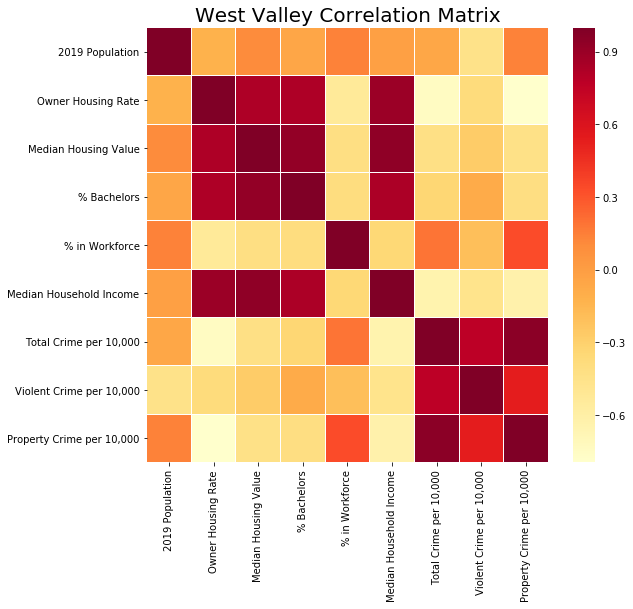

In [25]:
#Create a correlation matrix to review variables that appear to be related.
corrmat = wv_data2.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlOrRd", linewidths = 0.1) 
plt.title("West Valley Correlation Matrix", fontsize =20)

## 4. Foursquare Call

In this section, I pull in FourSquare data on popular venues in the selected cities.

In [64]:
#Credentials removed for posting project
CLIENT_ID = 'X' # your Foursquare ID
CLIENT_SECRET = 'XX' # your Foursquare Secret
VERSION = 'XXX' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X
CLIENT_SECRET:XX


In [27]:
#Read a .csv with all zip codes and associated long/lat for the cities in this analysis. The purpose of this additional step was to gather the most comprehensive data from foursquare on the region.
body = client_d362.get_object(Bucket='courseracapstoneproject-donotdelete-pr-',Key='wv_all_zip.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body2.__iter__ = types.MethodType( __iter__, body )

wv_all_zip = pd.read_csv(body)
wv_all_zip.head()

,City,Zip,Latitude,Longitude
0,Avondale,85323,33.454441,-112.32401
1,Avondale,85392,33.476400,-112.29800
2,Buckeye,85326,33.354418,-112.56941
3,Buckeye,85396,33.518300,-112.69140
4,El Mirage,85335,33.596823,-112.32364


In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=4800, limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            limit
        )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
wv_venues = getNearbyVenues(names=wv_data['City'],
                                   latitudes=wv_data['Latitude'],
                                   longitudes=wv_data['Longitude']
                                  )

Avondale
Buckeye
El Mirage
Glendale
Goodyear
Litchfield Park
Peoria
Surprise
Youngtown


In [30]:
#Check the size of the new dataframe
print(wv_venues.shape)
wv_venues.head()

(779, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Avondale,33.435596,-112.349602,Don Pancho Mexican Food,33.442239,-112.349153,Mexican Restaurant
1,Avondale,33.435596,-112.349602,TJ's Homestyle Restaurant,33.438576,-112.341375,American Restaurant
2,Avondale,33.435596,-112.349602,Rudy's BBQ,33.455564,-112.357591,BBQ Joint
3,Avondale,33.435596,-112.349602,Sam's Club,33.451935,-112.339053,Warehouse Store
4,Avondale,33.435596,-112.349602,In-N-Out Burger,33.459311,-112.340359,Fast Food Restaurant


In [31]:
#Check how many venues were returned in each city
wv_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Avondale,100,100,100,100,100,100
Buckeye,26,26,26,26,26,26
El Mirage,99,99,99,99,99,99
Glendale,54,54,54,54,54,54
Goodyear,100,100,100,100,100,100
Litchfield Park,100,100,100,100,100,100
Peoria,100,100,100,100,100,100
Surprise,100,100,100,100,100,100
Youngtown,100,100,100,100,100,100


In [32]:
print('There are {} uniques categories.'.format(len(wv_venues['Venue Category'].unique())))

There are 119 uniques categories.


In [33]:
# one hot encoding
wv_onehot = pd.get_dummies(wv_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
wv_onehot['City'] = wv_venues['City'] 

# move city column to the first column
fixed_columns = [wv_onehot.columns[-1]] + list(wv_onehot.columns[:-1])
wv_onehot = wv_onehot[fixed_columns]

wv_onehot.head()

,City,ATM,Airport,American Restaurant,Antique Shop,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,...,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Wings Joint
0,Avondale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Avondale,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Avondale,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Avondale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Avondale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Group all the venue data by city
wv_grouped = wv_onehot.groupby('City').mean().reset_index()
wv_grouped

,City,ATM,Airport,American Restaurant,Antique Shop,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,...,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Wings Joint
0,Avondale,0.00,0.01,0.040000,0.01,0.010000,0.01,0.000000,0.020000,0.010000,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.010000,0.01,0.01,0.000000
1,Buckeye,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.076923,0.000000,0.00,0.00,0.000000
2,El Mirage,0.00,0.00,0.030303,0.00,0.010101,0.00,0.010101,0.000000,0.010101,...,0.010101,0.000000,0.00,0.00,0.000000,0.020202,0.020202,0.00,0.00,0.010101
3,Glendale,0.00,0.00,0.037037,0.00,0.018519,0.00,0.000000,0.018519,0.000000,...,0.000000,0.037037,0.00,0.00,0.018519,0.000000,0.018519,0.00,0.00,0.000000
4,Goodyear,0.00,0.01,0.030000,0.01,0.010000,0.00,0.000000,0.020000,0.010000,...,0.000000,0.000000,0.00,0.00,0.010000,0.000000,0.010000,0.01,0.01,0.000000
5,Litchfield Park,0.00,0.00,0.030000,0.01,0.020000,0.00,0.000000,0.010000,0.010000,...,0.000000,0.020000,0.00,0.01,0.010000,0.000000,0.010000,0.00,0.01,0.000000
6,Peoria,0.01,0.00,0.020000,0.00,0.010000,0.01,0.000000,0.010000,0.000000,...,0.000000,0.000000,0.01,0.03,0.000000,0.010000,0.010000,0.00,0.00,0.000000
7,Surprise,0.00,0.00,0.040000,0.00,0.000000,0.00,0.000000,0.000000,0.010000,...,0.010000,0.000000,0.00,0.00,0.000000,0.000000,0.020000,0.01,0.00,0.010000
8,Youngtown,0.00,0.00,0.010000,0.00,0.010000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.01,0.000000,0.040000,0.000000,0.00,0.00,0.000000


In [35]:
num_top_venues = 10

for citi in wv_grouped['City']:
    print("----"+citi+"----")
    temp = wv_grouped[wv_grouped['City'] == citi].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Avondale----
                  venue  freq
0    Mexican Restaurant  0.09
1           Pizza Place  0.07
2   American Restaurant  0.04
3  Fast Food Restaurant  0.04
4     Convenience Store  0.04
5         Grocery Store  0.03
6           Coffee Shop  0.03
7   Japanese Restaurant  0.03
8        Baseball Field  0.02
9        Sandwich Place  0.02


----Buckeye----
                  venue  freq
0    Mexican Restaurant  0.15
1           Gas Station  0.12
2           Pizza Place  0.12
3        Discount Store  0.08
4        Sandwich Place  0.08
5           Video Store  0.08
6  Fast Food Restaurant  0.08
7           Coffee Shop  0.04
8              Pharmacy  0.04
9                  Café  0.04


----El Mirage----
                  venue  freq
0    Mexican Restaurant  0.07
1  Fast Food Restaurant  0.05
2     Convenience Store  0.05
3           Coffee Shop  0.05
4         Grocery Store  0.05
5        Sandwich Place  0.04
6              Pharmacy  0.04
7                 Diner  0.03
8   American Re

In [36]:
#Putting venue data into a DF for future analysis

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
#Create the dataframe and display the top 10 venues in each neighbohood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
wv_sorted_venues = pd.DataFrame(columns=columns)
wv_sorted_venues['City'] = wv_grouped['City']

for ind in np.arange(wv_grouped.shape[0]):
    wv_sorted_venues.iloc[ind, 1:] = return_most_common_venues(wv_grouped.iloc[ind, :], num_top_venues)

wv_sorted_venues

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Avondale,Mexican Restaurant,Pizza Place,Fast Food Restaurant,American Restaurant,Convenience Store,Japanese Restaurant,Grocery Store,Coffee Shop,Pharmacy,Ice Cream Shop
1,Buckeye,Mexican Restaurant,Pizza Place,Gas Station,Fast Food Restaurant,Sandwich Place,Discount Store,Video Store,Convenience Store,Café,Bank
2,El Mirage,Mexican Restaurant,Fast Food Restaurant,Grocery Store,Convenience Store,Coffee Shop,Pharmacy,Sandwich Place,Ice Cream Shop,American Restaurant,Diner
3,Glendale,Mexican Restaurant,Sandwich Place,Park,Convenience Store,Grocery Store,Fast Food Restaurant,Bar,Candy Store,Pizza Place,Thai Restaurant
4,Goodyear,Mexican Restaurant,Pizza Place,American Restaurant,Japanese Restaurant,Convenience Store,Seafood Restaurant,Bar,Fast Food Restaurant,Pharmacy,Brewery
5,Litchfield Park,Coffee Shop,Mexican Restaurant,Pizza Place,Grocery Store,Gym,Pharmacy,American Restaurant,Japanese Restaurant,Golf Course,Sushi Restaurant
6,Peoria,Pizza Place,Chinese Restaurant,Mexican Restaurant,Grocery Store,Convenience Store,Fast Food Restaurant,Gym / Fitness Center,Cosmetics Shop,Coffee Shop,Sandwich Place
7,Surprise,Pharmacy,Coffee Shop,Pizza Place,Grocery Store,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,American Restaurant,Italian Restaurant,Ice Cream Shop
8,Youngtown,Pizza Place,Mexican Restaurant,Pharmacy,Fast Food Restaurant,Convenience Store,Golf Course,Discount Store,Video Store,Intersection,Sandwich Place


In [38]:
#merge the venue & demographic data into on dataframe
wv_comp = pd.merge(wv_data, wv_sorted_venues, on='City', how='outer')
wv_comp

,City,Latitude,Longitude,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000",...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Avondale,33.435596,-112.349602,87931,0.54,196000,0.18,0.68,58938,355,...,Mexican Restaurant,Pizza Place,Fast Food Restaurant,American Restaurant,Convenience Store,Japanese Restaurant,Grocery Store,Coffee Shop,Pharmacy,Ice Cream Shop
1,Buckeye,33.370464,-112.583549,79620,0.71,196800,0.19,0.55,65932,207,...,Mexican Restaurant,Pizza Place,Gas Station,Fast Food Restaurant,Sandwich Place,Discount Store,Video Store,Convenience Store,Café,Bank
2,El Mirage,33.613094,-112.324604,35753,0.62,151500,0.15,0.69,54646,283,...,Mexican Restaurant,Fast Food Restaurant,Grocery Store,Convenience Store,Coffee Shop,Pharmacy,Sandwich Place,Ice Cream Shop,American Restaurant,Diner
3,Glendale,33.548264,-112.191696,252381,0.55,197600,0.21,0.62,52314,454,...,Mexican Restaurant,Sandwich Place,Park,Convenience Store,Grocery Store,Fast Food Restaurant,Bar,Candy Store,Pizza Place,Thai Restaurant
4,Goodyear,33.435341,-112.358253,86840,0.75,274500,0.30,0.57,80336,278,...,Mexican Restaurant,Pizza Place,American Restaurant,Japanese Restaurant,Convenience Store,Seafood Restaurant,Bar,Fast Food Restaurant,Pharmacy,Brewery
5,Litchfield Park,33.493412,-112.362480,6436,0.83,294900,0.49,0.56,80988,308,...,Coffee Shop,Mexican Restaurant,Pizza Place,Grocery Store,Gym,Pharmacy,American Restaurant,Japanese Restaurant,Golf Course,Sushi Restaurant
6,Peoria,33.580944,-112.237068,175961,0.73,248700,0.32,0.64,73039,213,...,Pizza Place,Chinese Restaurant,Mexican Restaurant,Grocery Store,Convenience Store,Fast Food Restaurant,Gym / Fitness Center,Cosmetics Shop,Coffee Shop,Sandwich Place
7,Surprise,33.630554,-112.366669,141664,0.75,225200,0.27,0.56,65160,166,...,Pharmacy,Coffee Shop,Pizza Place,Grocery Store,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,American Restaurant,Italian Restaurant,Ice Cream Shop
8,Youngtown,33.593928,-112.302936,6859,0.52,141800,0.13,0.58,41441,485,...,Pizza Place,Mexican Restaurant,Pharmacy,Fast Food Restaurant,Convenience Store,Golf Course,Discount Store,Video Store,Intersection,Sandwich Place


## 5. Clustering the West Valley Cities

In this final section, I use Kmeans to cluster the West Valley cities.

### Cluster Cities Based on Complete Data

This initial analysis utilizes the full dataset to cluster the cities.

In [39]:
#Run k-means to cluster the cities into 4 clusters based on demographics & venues
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

wv_clusters = wv_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(wv_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 1, 0, 2, 2, 2, 1, 1], dtype=int32)

In [40]:
#Create the new dataframe with the 4 clusters and the top 10 venues for each city

# add clustering labels
wv_comp.insert(0, 'Cluster Labels', kmeans.labels_)

wv_comp.head()

,Cluster Labels,City,Latitude,Longitude,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Avondale,33.435596,-112.349602,87931,0.54,196000,0.18,0.68,58938,...,Mexican Restaurant,Pizza Place,Fast Food Restaurant,American Restaurant,Convenience Store,Japanese Restaurant,Grocery Store,Coffee Shop,Pharmacy,Ice Cream Shop
1,3,Buckeye,33.370464,-112.583549,79620,0.71,196800,0.19,0.55,65932,...,Mexican Restaurant,Pizza Place,Gas Station,Fast Food Restaurant,Sandwich Place,Discount Store,Video Store,Convenience Store,Café,Bank
2,1,El Mirage,33.613094,-112.324604,35753,0.62,151500,0.15,0.69,54646,...,Mexican Restaurant,Fast Food Restaurant,Grocery Store,Convenience Store,Coffee Shop,Pharmacy,Sandwich Place,Ice Cream Shop,American Restaurant,Diner
3,0,Glendale,33.548264,-112.191696,252381,0.55,197600,0.21,0.62,52314,...,Mexican Restaurant,Sandwich Place,Park,Convenience Store,Grocery Store,Fast Food Restaurant,Bar,Candy Store,Pizza Place,Thai Restaurant
4,2,Goodyear,33.435341,-112.358253,86840,0.75,274500,0.30,0.57,80336,...,Mexican Restaurant,Pizza Place,American Restaurant,Japanese Restaurant,Convenience Store,Seafood Restaurant,Bar,Fast Food Restaurant,Pharmacy,Brewery


In [41]:
#Install libraries to map the clusters
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Import complete')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Import complete


In [45]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [46]:
address = 'Maricopa County AZ'

geolocator = Nominatim(user_agent="wv_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Maricopa County, AZ are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Maricopa County, AZ are 33.34883, -112.49123.


In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wv_comp['Latitude'], wv_comp['Longitude'], wv_comp['City'], wv_comp['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine the Clusters

In the following cells, we break out each cluster for the purpose of examining the features that resulted in the clustering. The results will be analyzed in the attached repot.

In [48]:
#Cluster 0
wv_comp.loc[wv_comp['Cluster Labels'] == 0, wv_comp.columns[[1] + list(range(5, wv_comp.shape[1]))]]

,City,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000",1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Glendale,0.55,197600,0.21,0.62,52314,454,47,408,Mexican Restaurant,Sandwich Place,Park,Convenience Store,Grocery Store,Fast Food Restaurant,Bar,Candy Store,Pizza Place,Thai Restaurant


In [49]:
#Cluster 1
wv_comp.loc[wv_comp['Cluster Labels'] == 1, wv_comp.columns[[1] + list(range(5, wv_comp.shape[1]))]]

,City,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000",1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,El Mirage,0.62,151500,0.15,0.69,54646,283,22,261,Mexican Restaurant,Fast Food Restaurant,Grocery Store,Convenience Store,Coffee Shop,Pharmacy,Sandwich Place,Ice Cream Shop,American Restaurant,Diner
7,Surprise,0.75,225200,0.27,0.56,65160,166,12,154,Pharmacy,Coffee Shop,Pizza Place,Grocery Store,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,American Restaurant,Italian Restaurant,Ice Cream Shop
8,Youngtown,0.52,141800,0.13,0.58,41441,485,134,350,Pizza Place,Mexican Restaurant,Pharmacy,Fast Food Restaurant,Convenience Store,Golf Course,Discount Store,Video Store,Intersection,Sandwich Place


In [50]:
#Cluster 2
wv_comp.loc[wv_comp['Cluster Labels'] == 2, wv_comp.columns[[1] + list(range(5, wv_comp.shape[1]))]]

,City,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000",1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Avondale,0.54,196000,0.18,0.68,58938,355,34,321,Mexican Restaurant,Pizza Place,Fast Food Restaurant,American Restaurant,Convenience Store,Japanese Restaurant,Grocery Store,Coffee Shop,Pharmacy,Ice Cream Shop
4,Goodyear,0.75,274500,0.30,0.57,80336,278,25,253,Mexican Restaurant,Pizza Place,American Restaurant,Japanese Restaurant,Convenience Store,Seafood Restaurant,Bar,Fast Food Restaurant,Pharmacy,Brewery
5,Litchfield Park,0.83,294900,0.49,0.56,80988,308,73,235,Coffee Shop,Mexican Restaurant,Pizza Place,Grocery Store,Gym,Pharmacy,American Restaurant,Japanese Restaurant,Golf Course,Sushi Restaurant
6,Peoria,0.73,248700,0.32,0.64,73039,213,23,190,Pizza Place,Chinese Restaurant,Mexican Restaurant,Grocery Store,Convenience Store,Fast Food Restaurant,Gym / Fitness Center,Cosmetics Shop,Coffee Shop,Sandwich Place


In [51]:
#Cluster 3
wv_comp.loc[wv_comp['Cluster Labels'] == 3, wv_comp.columns[[1] + list(range(5, wv_comp.shape[1]))]]

,City,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000",1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Buckeye,0.71,196800,0.19,0.55,65932,207,18,189,Mexican Restaurant,Pizza Place,Gas Station,Fast Food Restaurant,Sandwich Place,Discount Store,Video Store,Convenience Store,Café,Bank


### Cluster Cities Based on Demographics

In order to examine how the cities would cluster based on just demographics, I ran a second Kmeans using the data withotu the venues included. These results will be discusse din the attached report.

In [53]:
#Run k-means to cluster the cities into 4 clusters based on venues
# set number of clusters
kclusters = 4

wv_clusters_demo = wv_data.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(wv_clusters_demo)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 3, 2, 1, 0, 2, 1, 3], dtype=int32)

In [55]:
#Create the new dataframe with the 4 clusters and the top 10 venues for each city

# add clustering labels
wv_data.insert(0, 'Cluster Labels', kmeans.labels_)

wv_data.head()

,Cluster Labels,City,Latitude,Longitude,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000"
0,1,Avondale,33.435596,-112.349602,87931,0.54,196000,0.18,0.68,58938,355,34,321
1,1,Buckeye,33.370464,-112.583549,79620,0.71,196800,0.19,0.55,65932,207,18,189
2,3,El Mirage,33.613094,-112.324604,35753,0.62,151500,0.15,0.69,54646,283,22,261
3,2,Glendale,33.548264,-112.191696,252381,0.55,197600,0.21,0.62,52314,454,47,408
4,1,Goodyear,33.435341,-112.358253,86840,0.75,274500,0.30,0.57,80336,278,25,253


In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wv_data['Latitude'], wv_data['Longitude'], wv_data['City'], wv_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [57]:
#Merged the venue data back into the df to see what venues are common in each cluster.
wv_comp_data = pd.merge(wv_data, wv_sorted_venues, on='City', how='outer')
wv_comp_data

,Cluster Labels,City,Latitude,Longitude,2019 Population,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Avondale,33.435596,-112.349602,87931,0.54,196000,0.18,0.68,58938,...,Mexican Restaurant,Pizza Place,Fast Food Restaurant,American Restaurant,Convenience Store,Japanese Restaurant,Grocery Store,Coffee Shop,Pharmacy,Ice Cream Shop
1,1,Buckeye,33.370464,-112.583549,79620,0.71,196800,0.19,0.55,65932,...,Mexican Restaurant,Pizza Place,Gas Station,Fast Food Restaurant,Sandwich Place,Discount Store,Video Store,Convenience Store,Café,Bank
2,3,El Mirage,33.613094,-112.324604,35753,0.62,151500,0.15,0.69,54646,...,Mexican Restaurant,Fast Food Restaurant,Grocery Store,Convenience Store,Coffee Shop,Pharmacy,Sandwich Place,Ice Cream Shop,American Restaurant,Diner
3,2,Glendale,33.548264,-112.191696,252381,0.55,197600,0.21,0.62,52314,...,Mexican Restaurant,Sandwich Place,Park,Convenience Store,Grocery Store,Fast Food Restaurant,Bar,Candy Store,Pizza Place,Thai Restaurant
4,1,Goodyear,33.435341,-112.358253,86840,0.75,274500,0.30,0.57,80336,...,Mexican Restaurant,Pizza Place,American Restaurant,Japanese Restaurant,Convenience Store,Seafood Restaurant,Bar,Fast Food Restaurant,Pharmacy,Brewery
5,0,Litchfield Park,33.493412,-112.362480,6436,0.83,294900,0.49,0.56,80988,...,Coffee Shop,Mexican Restaurant,Pizza Place,Grocery Store,Gym,Pharmacy,American Restaurant,Japanese Restaurant,Golf Course,Sushi Restaurant
6,2,Peoria,33.580944,-112.237068,175961,0.73,248700,0.32,0.64,73039,...,Pizza Place,Chinese Restaurant,Mexican Restaurant,Grocery Store,Convenience Store,Fast Food Restaurant,Gym / Fitness Center,Cosmetics Shop,Coffee Shop,Sandwich Place
7,1,Surprise,33.630554,-112.366669,141664,0.75,225200,0.27,0.56,65160,...,Pharmacy,Coffee Shop,Pizza Place,Grocery Store,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,American Restaurant,Italian Restaurant,Ice Cream Shop
8,3,Youngtown,33.593928,-112.302936,6859,0.52,141800,0.13,0.58,41441,...,Pizza Place,Mexican Restaurant,Pharmacy,Fast Food Restaurant,Convenience Store,Golf Course,Discount Store,Video Store,Intersection,Sandwich Place


In [58]:
#Cluster 0
wv_comp_data.loc[wv_comp_data['Cluster Labels'] == 0, wv_comp_data.columns[[1] + list(range(5, wv_comp_data.shape[1]))]]

,City,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000",1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Litchfield Park,0.83,294900,0.49,0.56,80988,308,73,235,Coffee Shop,Mexican Restaurant,Pizza Place,Grocery Store,Gym,Pharmacy,American Restaurant,Japanese Restaurant,Golf Course,Sushi Restaurant


In [59]:
#Cluster 1
wv_comp_data.loc[wv_comp_data['Cluster Labels'] == 1, wv_comp_data.columns[[1] + list(range(5, wv_comp_data.shape[1]))]]

,City,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000",1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Avondale,0.54,196000,0.18,0.68,58938,355,34,321,Mexican Restaurant,Pizza Place,Fast Food Restaurant,American Restaurant,Convenience Store,Japanese Restaurant,Grocery Store,Coffee Shop,Pharmacy,Ice Cream Shop
1,Buckeye,0.71,196800,0.19,0.55,65932,207,18,189,Mexican Restaurant,Pizza Place,Gas Station,Fast Food Restaurant,Sandwich Place,Discount Store,Video Store,Convenience Store,Café,Bank
4,Goodyear,0.75,274500,0.30,0.57,80336,278,25,253,Mexican Restaurant,Pizza Place,American Restaurant,Japanese Restaurant,Convenience Store,Seafood Restaurant,Bar,Fast Food Restaurant,Pharmacy,Brewery
7,Surprise,0.75,225200,0.27,0.56,65160,166,12,154,Pharmacy,Coffee Shop,Pizza Place,Grocery Store,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,American Restaurant,Italian Restaurant,Ice Cream Shop


In [60]:
#Cluster 2
wv_comp_data.loc[wv_comp_data['Cluster Labels'] == 2, wv_comp_data.columns[[1] + list(range(5, wv_comp_data.shape[1]))]]

,City,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000",1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Glendale,0.55,197600,0.21,0.62,52314,454,47,408,Mexican Restaurant,Sandwich Place,Park,Convenience Store,Grocery Store,Fast Food Restaurant,Bar,Candy Store,Pizza Place,Thai Restaurant
6,Peoria,0.73,248700,0.32,0.64,73039,213,23,190,Pizza Place,Chinese Restaurant,Mexican Restaurant,Grocery Store,Convenience Store,Fast Food Restaurant,Gym / Fitness Center,Cosmetics Shop,Coffee Shop,Sandwich Place


In [61]:
#Cluster 3
wv_comp_data.loc[wv_comp_data['Cluster Labels'] == 3, wv_comp_data.columns[[1] + list(range(5, wv_comp_data.shape[1]))]]

,City,Owner Housing Rate,Median Housing Value,% Bachelors,% in Workforce,Median Household Income,"Total Crime per 10,000","Violent Crime per 10,000","Property Crime per 10,000",1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,El Mirage,0.62,151500,0.15,0.69,54646,283,22,261,Mexican Restaurant,Fast Food Restaurant,Grocery Store,Convenience Store,Coffee Shop,Pharmacy,Sandwich Place,Ice Cream Shop,American Restaurant,Diner
8,Youngtown,0.52,141800,0.13,0.58,41441,485,134,350,Pizza Place,Mexican Restaurant,Pharmacy,Fast Food Restaurant,Convenience Store,Golf Course,Discount Store,Video Store,Intersection,Sandwich Place
